In [1]:
import time
import random 
import bisect 
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Module.count import *
from Module.count_col import *
from Module.Curve_Fitting_MLE import *
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
name = 'ep40ch30'
filename = name + '.txt' #change filename if you want to get statictical information of another

In [3]:
##text file.
big, syl, word, longest = info(filename, encode)
#count_col(word, syl)

read file successfully!
Successfully count word freqency!(ep40ch30.txt)
Successfully count syl freqency!
Successfully build data frames!


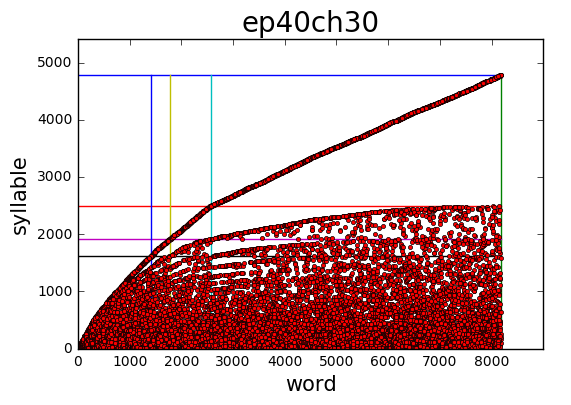

11.252643585205078


In [4]:
V, H = geometric_sequence(word, syl)

need_line = 'Y'
number_of_lines = 4
Color = '#ff0000'
SP = 'N' #If you don't want to save picture, just assign SP != 'T'
FORMAT = 'png' #the format of your picture

tStart = time.time()
cooridnate = draw_RRD_plot(big, word, syl, longest, name, V, H, need_line, number_of_lines, Color, SP , FORMAT)
tEnd = time.time()
print(tEnd-tStart)

In [5]:
x, y = [], []
for i in range(len(cooridnate)):
    x.append(cooridnate[i][0])
    y.append(cooridnate[i][1])

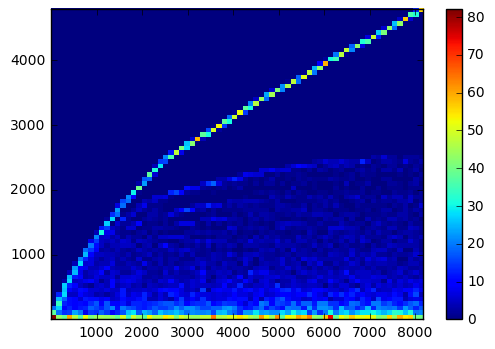

In [10]:
draw_density_plot(x, y, 70)